# <b>CS156 (Introduction to AI), Spring 2022</b>
# <u><b>Homework 9 submission</b></u>

### Roster Name: Bernard Tan
### Preferred Name (if different): Bernard
### Student ID: 015215317
### Email address: bernard.tan@sjsu.edu
Any special notes or anything you would like to communicate to me about this homework submission goes in here.

##  <u>References and sources </u>

List all your references and sources here.
This includes all sites/discussion boards/blogs/posts/etc. where you grabbed some code examples.

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import numpy as np
from tensorflow.keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from numpy import argmax, array_equal
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model
from random import randint
import pandas as pd
import numpy as np
from tensorflow.keras import layers
from PIL import Image
from tensorflow.keras import regularizers
from tensorflow.keras import backend
from datetime import datetime

In [ ]:
np.random.seed(42)

In [ ]:
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train_valid, y_train_valid), (x_test, y_test) = keras.datasets.fashion_mnist.load_data() 
x_train, x_validation, y_train, y_validation = train_test_split(x_train_valid, y_train_valid, test_size=0.2, random_state=0)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_validation = x_validation.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train.shape, x_validation.shape, x_test.shape

((48000, 28, 28), (12000, 28, 28), (10000, 28, 28))

In [ ]:
# Reshape the images into flat ANN layers
x_train = x_train.reshape(-1, 784)
x_validation = x_validation.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

x_train.shape, x_validation.shape, x_test.shape

((48000, 784), (12000, 784), (10000, 784))

In [ ]:
## input layer
# 28*28
input_layer = Input(shape=(784,))  

## encoding architecture
encode_layer1 = Dense(128, activation='relu')(input_layer)
encode_layer2 = Dense(64, activation='relu')(encode_layer1)
encode_layer3 = Dense(32, activation='relu')(encode_layer2)

## decoding architecture
decode_layer1 = Dense(64, activation='relu')(encode_layer3)
decode_layer2 = Dense(128, activation='relu')(decode_layer1)
decode_layer3 = Dense(784, activation='relu')(decode_layer2)

model = Model(input_layer, decode_layer3)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 784)               101136

In [ ]:
model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
model.fit(x_train, x_train, epochs=30, batch_size=2048, validation_data=(x_validation, x_validation), callbacks=[early_stopping])

Epoch 1/30
24/24 [==============================] - 1s 30ms/step - loss: 0.1150 - val_loss: 0.0887
Epoch 2/30
24/24 [==============================] - 1s 24ms/step - loss: 0.0781 - val_loss: 0.0686
Epoch 3/30
24/24 [==============================] - 1s 25ms/step - loss: 0.0619 - val_loss: 0.0541
Epoch 4/30
24/24 [==============================] - 1s 25ms/step - loss: 0.0476 - val_loss: 0.0425
Epoch 5/30
24/24 [==============================] - 1s 25ms/step - loss: 0.0391 - val_loss: 0.0360
Epoch 6/30
24/24 [==============================] - 1s 25ms/step - loss: 0.0340 - val_loss: 0.0325
Epoch 7/30
24/24 [==============================] - 1s 25ms/step - loss: 0.0315 - val_loss: 0.0310
Epoch 8/30
24/24 [==============================] - 1s 25ms/step - loss: 0.0300 - val_loss: 0.0297
Epoch 9/30
24/24 [==============================] - 1s 25ms/step - loss: 0.0290 - val_loss: 0.0288
Epoch 10/30
24/24 [==============================] - 1s 25ms/step - loss: 0.0282 - val_loss: 0.0280
Epoch 11/

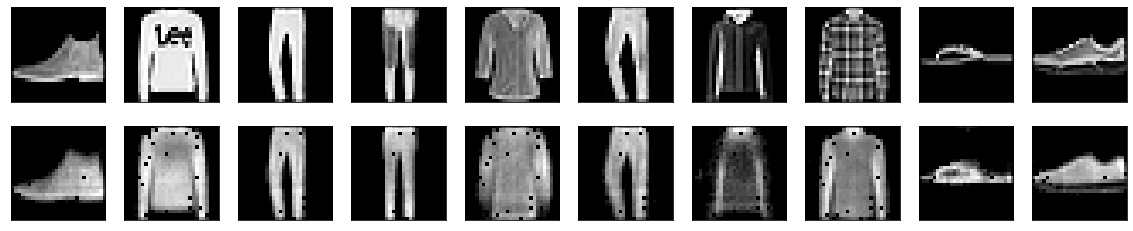

In [ ]:
predictions = model.predict(x_test)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train_valid, y_train_valid), (x_test, y_test) = keras.datasets.fashion_mnist.load_data() 
x_train, x_validation, y_train, y_validation = train_test_split(x_train_valid, y_train_valid, test_size=0.2, random_state=0)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_validation = x_validation.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train.shape, x_validation.shape, x_test.shape

((48000, 28, 28), (12000, 28, 28), (10000, 28, 28))

In [ ]:
# shape back into image matrices
x_train = x_train.reshape(-1, 28, 28, 1)
x_validation = x_validation.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train.shape, x_validation.shape, x_test.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_validation_noisy = x_validation + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_validation.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_validation_noisy = np.clip(x_validation_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [ ]:
input_layer = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 32)        0   

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=30,
                batch_size=2048,
                shuffle=True,
                validation_data=(x_validation_noisy, x_validation))

Epoch 1/30
24/24 [==============================] - 38s 2s/step - loss: 0.5426 - val_loss: 0.3880
Epoch 2/30
24/24 [==============================] - 38s 2s/step - loss: 0.3628 - val_loss: 0.3446
Epoch 3/30
24/24 [==============================] - 38s 2s/step - loss: 0.3353 - val_loss: 0.3266
Epoch 4/30
24/24 [==============================] - 38s 2s/step - loss: 0.3223 - val_loss: 0.3181
Epoch 5/30
24/24 [==============================] - 38s 2s/step - loss: 0.3164 - val_loss: 0.3145
Epoch 6/30
24/24 [==============================] - 38s 2s/step - loss: 0.3129 - val_loss: 0.3113
Epoch 7/30
24/24 [==============================] - 37s 2s/step - loss: 0.3104 - val_loss: 0.3092
Epoch 8/30
24/24 [==============================] - 39s 2s/step - loss: 0.3087 - val_loss: 0.3073
Epoch 9/30
24/24 [==============================] - 38s 2s/step - loss: 0.3069 - val_loss: 0.3059
Epoch 10/30
24/24 [==============================] - 38s 2s/step - loss: 0.3058 - val_loss: 0.3048
Epoch 11/30
24/24 [

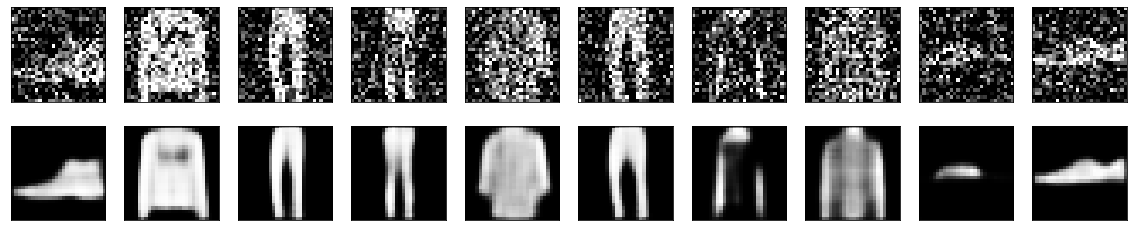

In [ ]:
predictions = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # noisy
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()